In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/'\
                    'PacktWorkshops/'\
                    'The-Data-Analysis-Workshop/'\
                    'master/Chapter01/data/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- There are no missing values or typos to be imputed.

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


- those columns (season, yr, mnth, weekday, weathersit) need to be mapped into their real names.
- those collumns (hum, windspeed) need to be trasformed into their real valus.

In [ ]:
# create a copy of the original data
preprocessed_data = df.copy()

# transform dteday column into datetime type
preprocessed_data['dteday'] = pd.to_datetime(preprocessed_data['dteday'])

# define a function for mapping values
def map_values(column, mapping):
    preprocessed_data[column] = preprocessed_data[column].map(mapping)

# transform seasons, yr, weekday, and weathersit using the map_values() function
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
map_values('season', seasons_mapping)

yr_mapping = {0: 2011, 1: 2012}
map_values('yr', yr_mapping)

weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
map_values('weekday', weekday_mapping)

weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
map_values('weathersit', weather_mapping)

# transform hum and windspeed using the apply() method
preprocessed_data[['hum', 'windspeed']] = preprocessed_data[['hum', 'windspeed']].apply(lambda x: x * 100 if x.name == 'hum' else x * 67)

# drop the instant column because there is no use for it
preprocessed_data.drop('instant', axis=1, inplace=True)

# write preprocessed data to CSV file
preprocessed_data.to_csv('preprocessed_data.csv')


- Visualizing Distributions. 

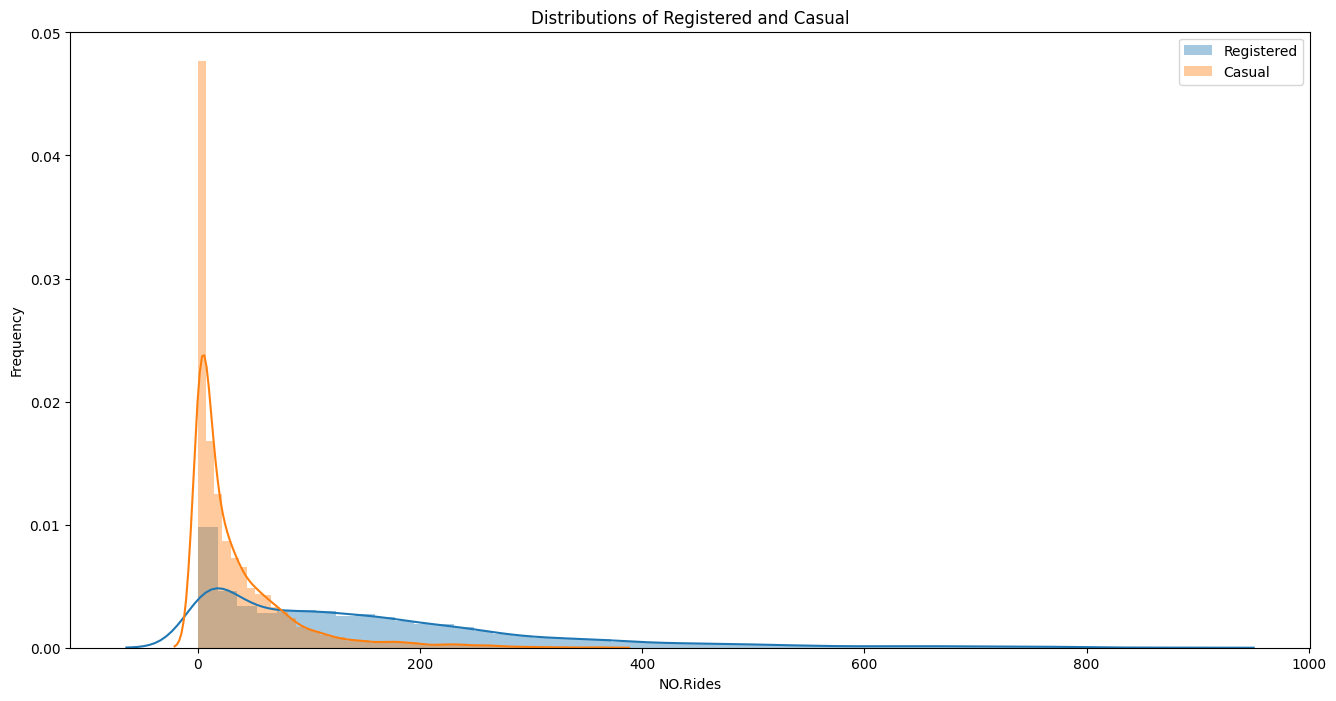

In [ ]:
plt.figure(figsize=(16, 8))
sns.distplot(preprocessed_data['registered'], label='Registered')
sns.distplot(preprocessed_data['casual'], label='Casual')
plt.legend()
plt.xlabel('NO.Rides')
plt.ylabel('Frequency')
plt.title('Distributions of Registered and Casual')
plt.savefig('Figures/Distributions of Registered and Casual.png', format='png')

- Count Plots for categorical columns and binomial columns.

In [ ]:
def countplot_func(col, rot=0, figsize=(10, 4)):
    cols = [col, 'casual', 'registered']
    plot_data = preprocessed_data[cols].groupby(col).agg('sum')
    plot_data.plot(rot=rot, kind='bar', figsize=figsize)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f'Casual and Registered of each {col}')
    plt.savefig(f'figures/casual and registered Counts for {col}')
    plt.show()

- We have three categorical columns (season, weekday, weathersit) and Binomial columns(holiday, workingday) and Timing columns (hr, mnth), So we will count the casual and registered values for each column of those.

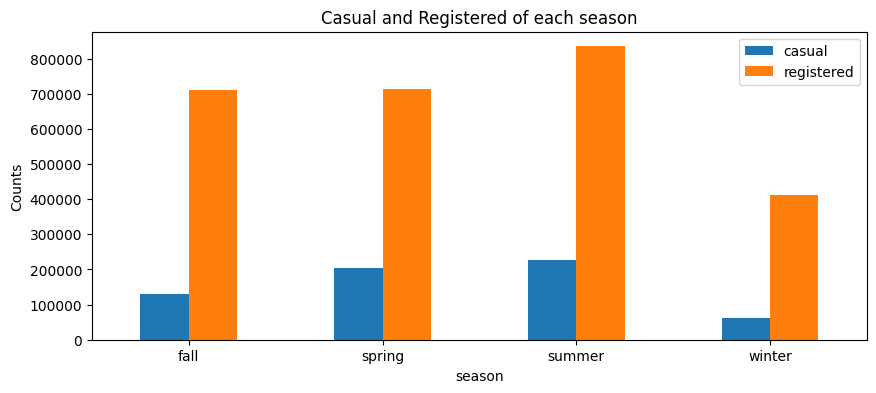

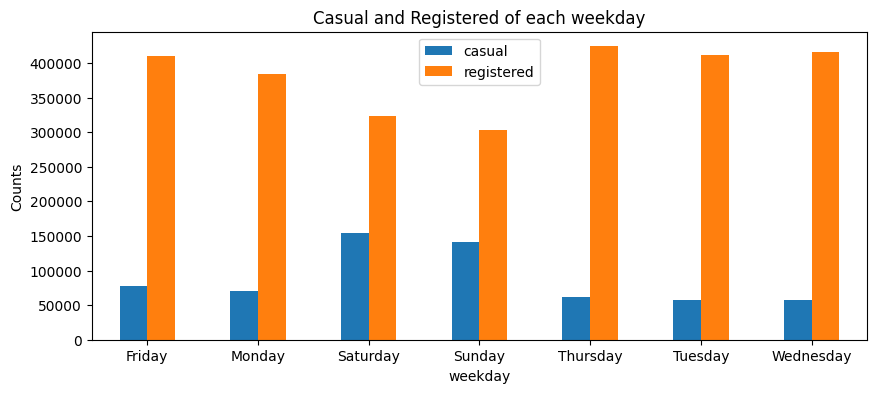

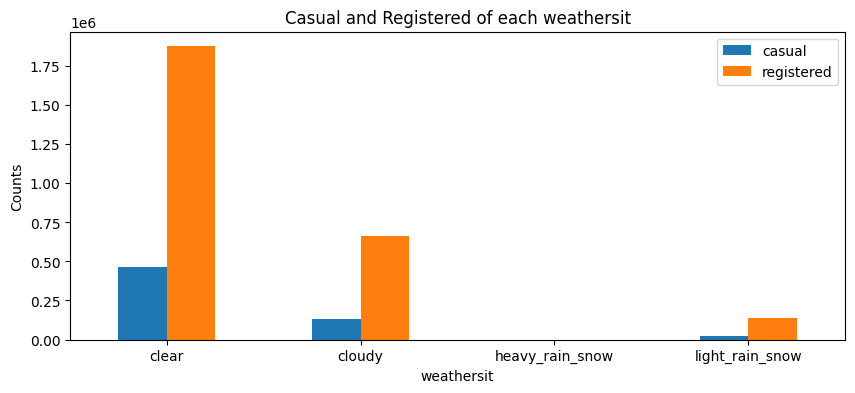

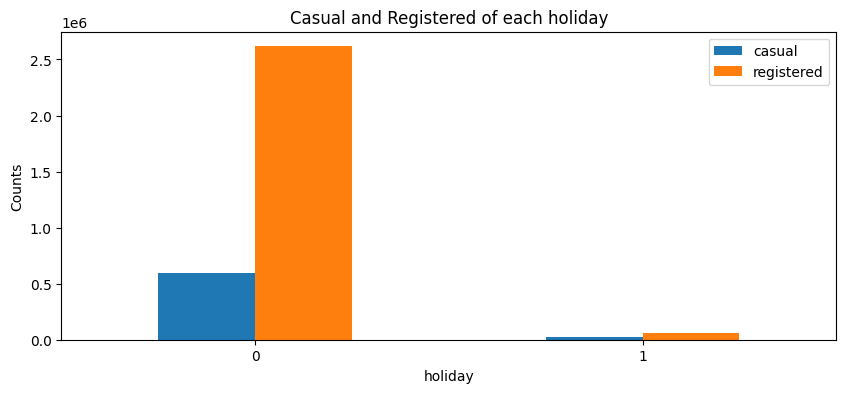

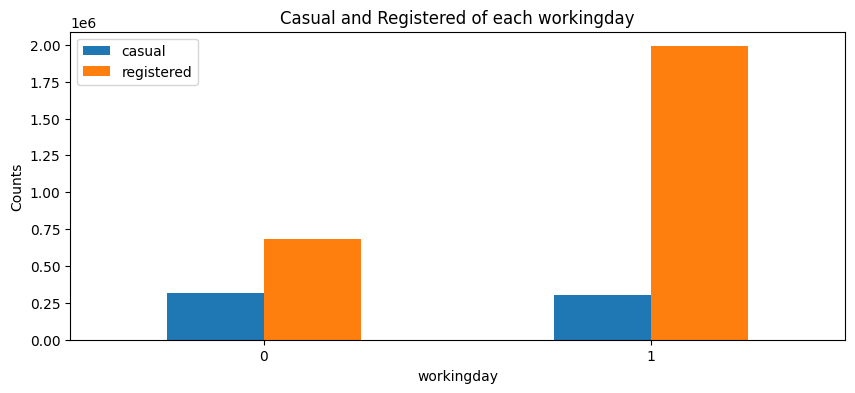

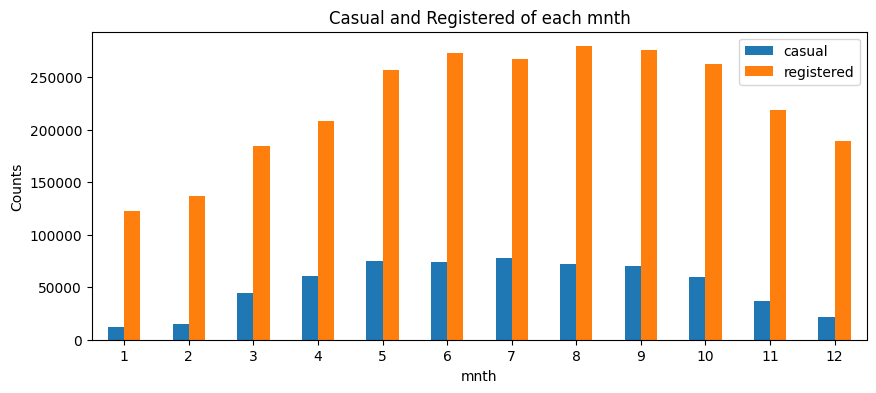

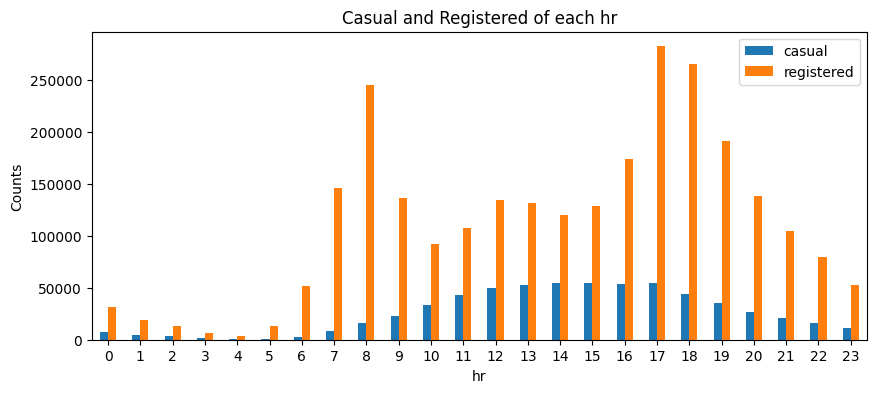

In [ ]:
cols = ['season', 'weekday', 'weathersit', 'holiday', 'workingday', 'mnth', 'hr']
for col in cols:
    countplot_func(col)

- Visualizing every hour and days of the week on each season.

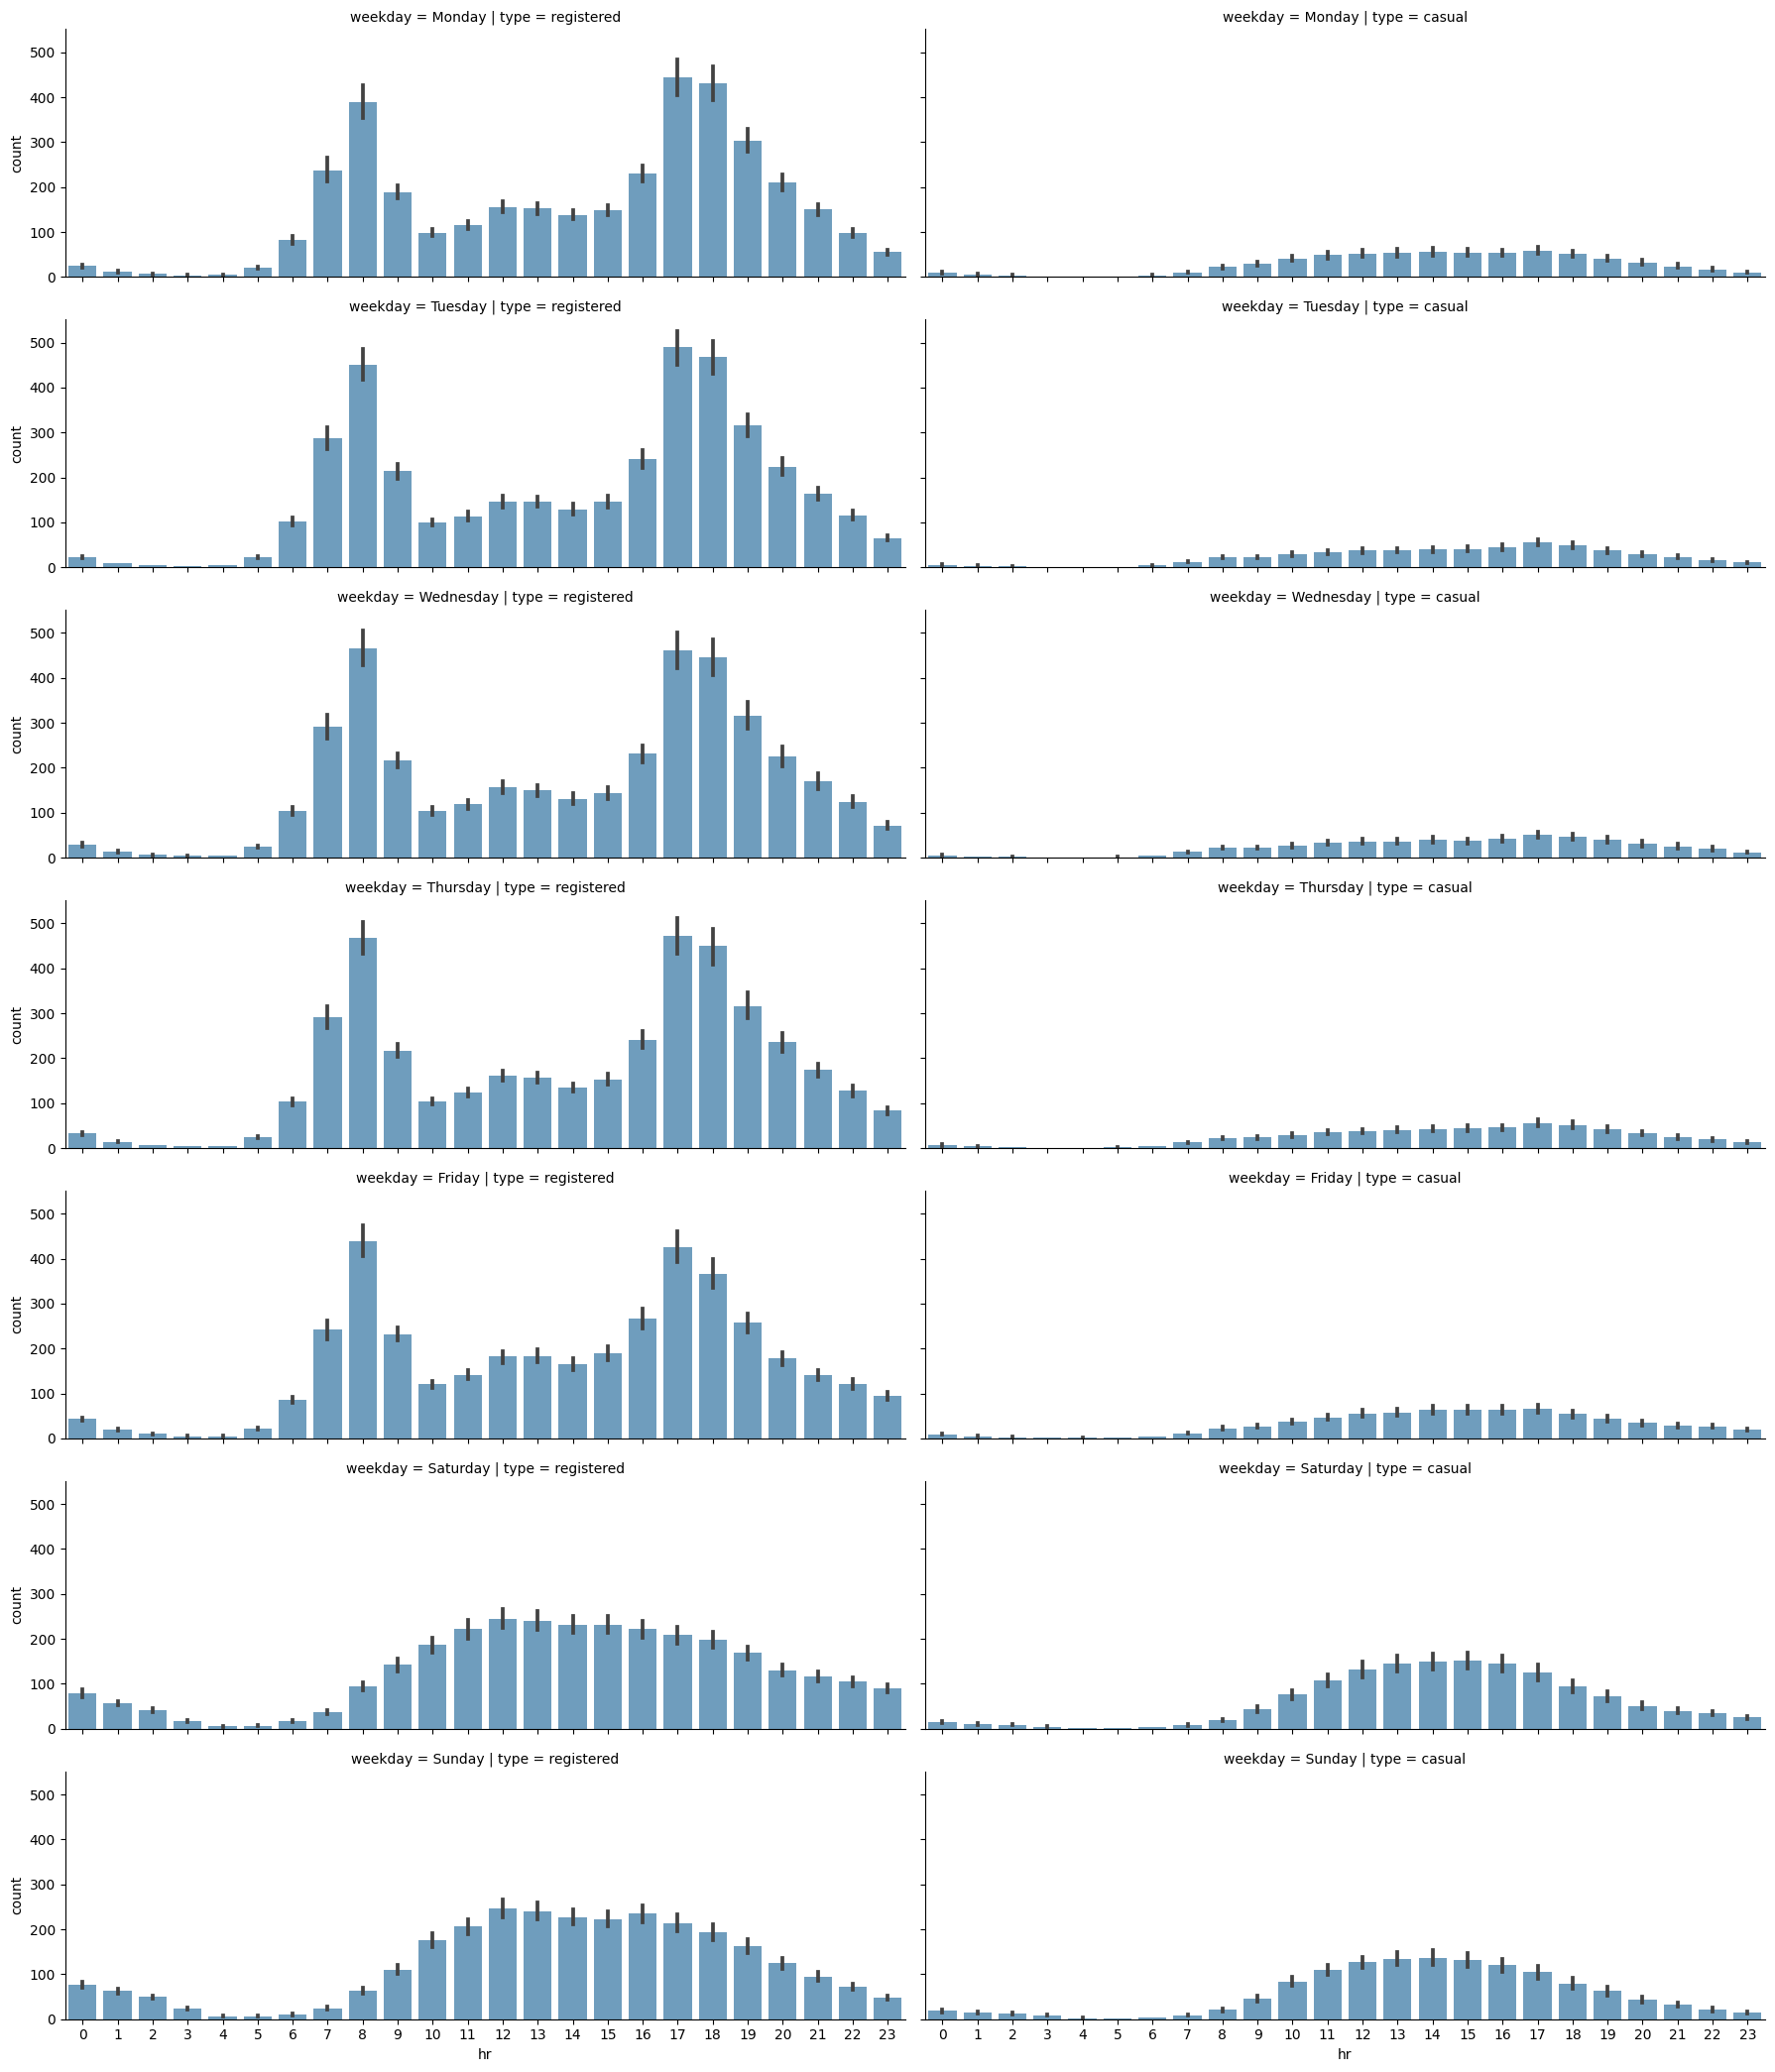

In [ ]:
cols = ['hr', 'weekday', 'registered', 'casual']  # Select the needed columns
data = preprocessed_data[cols].melt(id_vars=['weekday', 'hr'],\
                                    var_name='type', value_name='count')  # Create unpivot table to plot

order = ['Monday', 'Tuesday', 'Wednesday',\
         'Thursday', 'Friday', 'Saturday', 'Sunday']  # the order of the days

ax = sns.FacetGrid(data=data, row='weekday',\
                   col='type', row_order=order, height=3, aspect=3)  # face grid for the plots

ax.map(sns.barplot, 'hr', 'count', alpha=0.7)  # apply the barplot  as  our plot

plt.savefig('Figures/Rides in each day represented by hours.png', format='png')

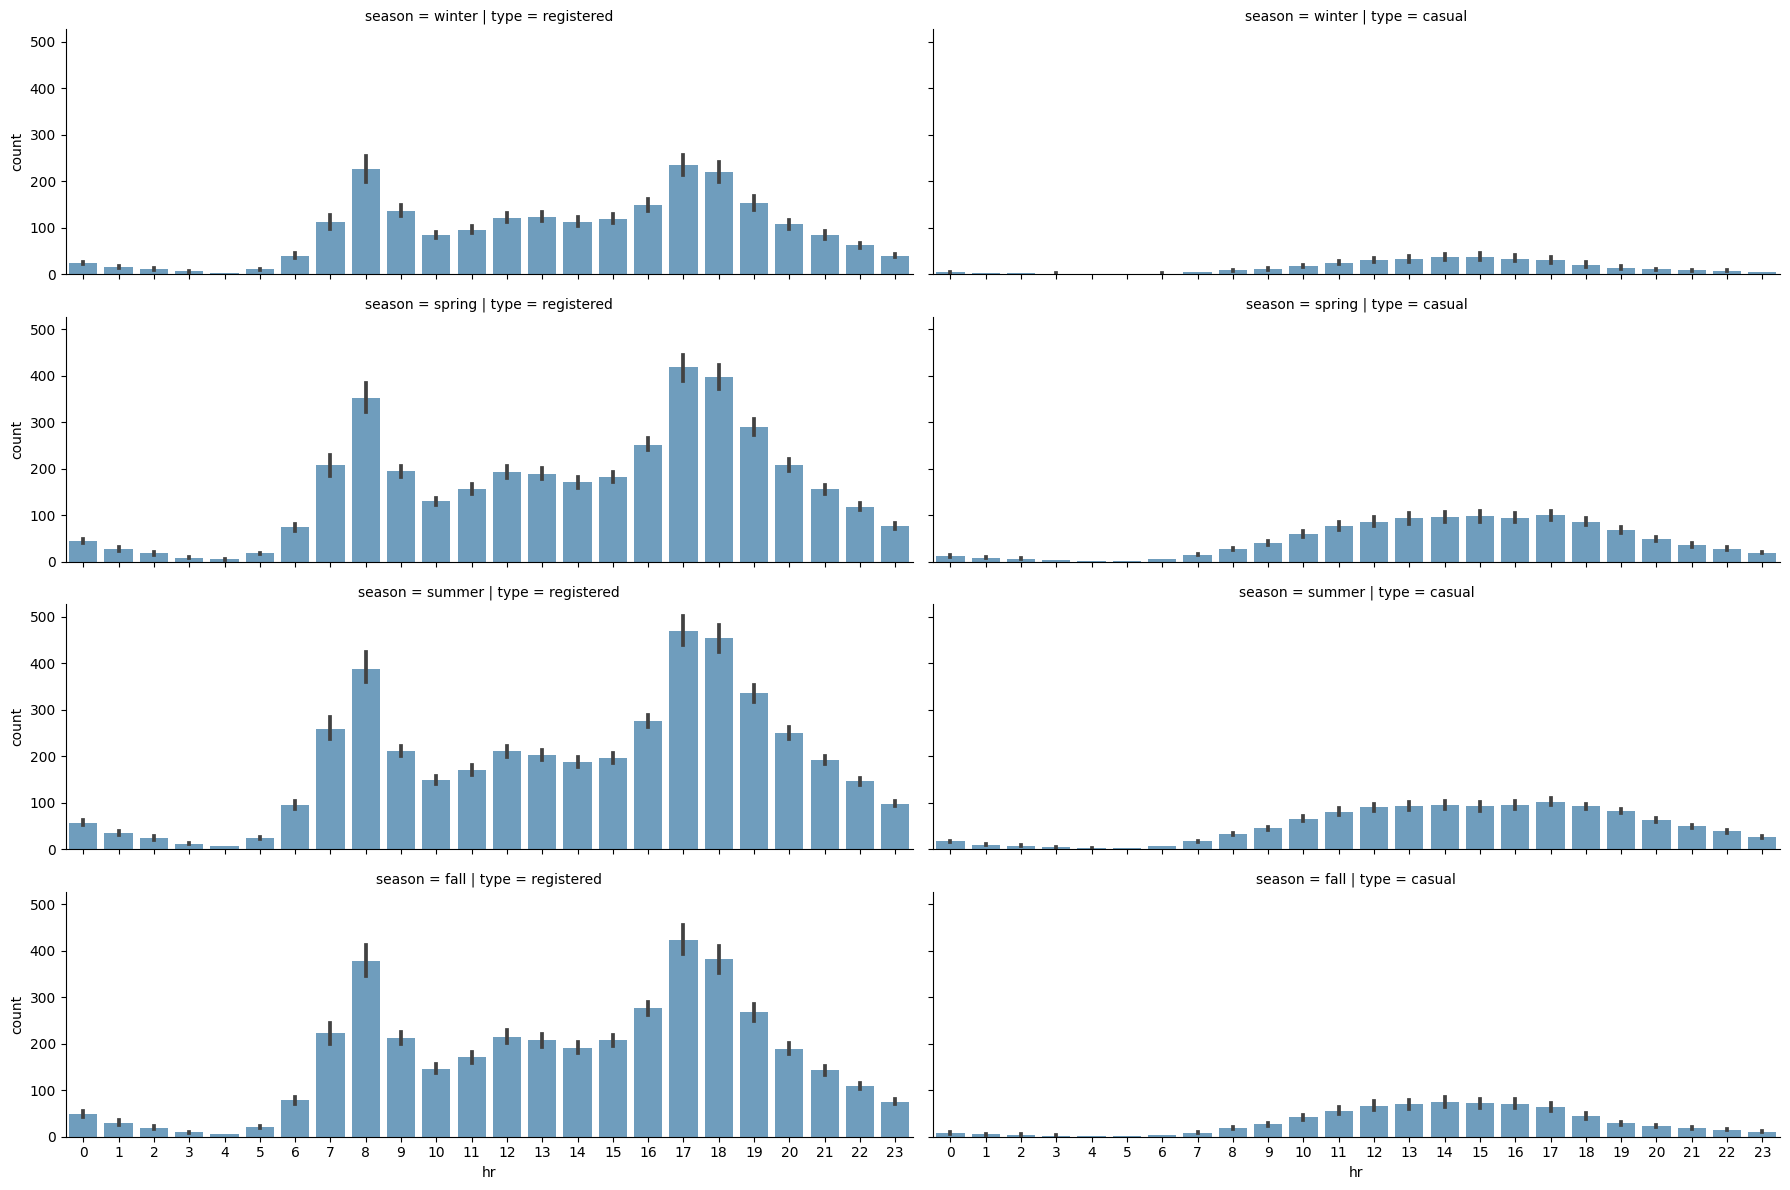

In [ ]:
cols = ['hr', 'season', 'registered', 'casual']  # Select the needed columns
data = preprocessed_data[cols].melt(id_vars=['hr', 'season'],\
                                    var_name='type', value_name='count')  # Create unpivot table to plot

order = ['winter', 'spring', 'summer', 'fall']  # the order of the Seasons
ax = sns.FacetGrid(data=data, row='season', col='type',\
                   row_order=order, height=3, aspect=3)  # face grid for the plots

ax.map(sns.barplot, 'hr', 'count', alpha=0.7)  # apply the barplot  as  our plot

plt.savefig('Figures/Rides for each by hours of the day.png', format='png')

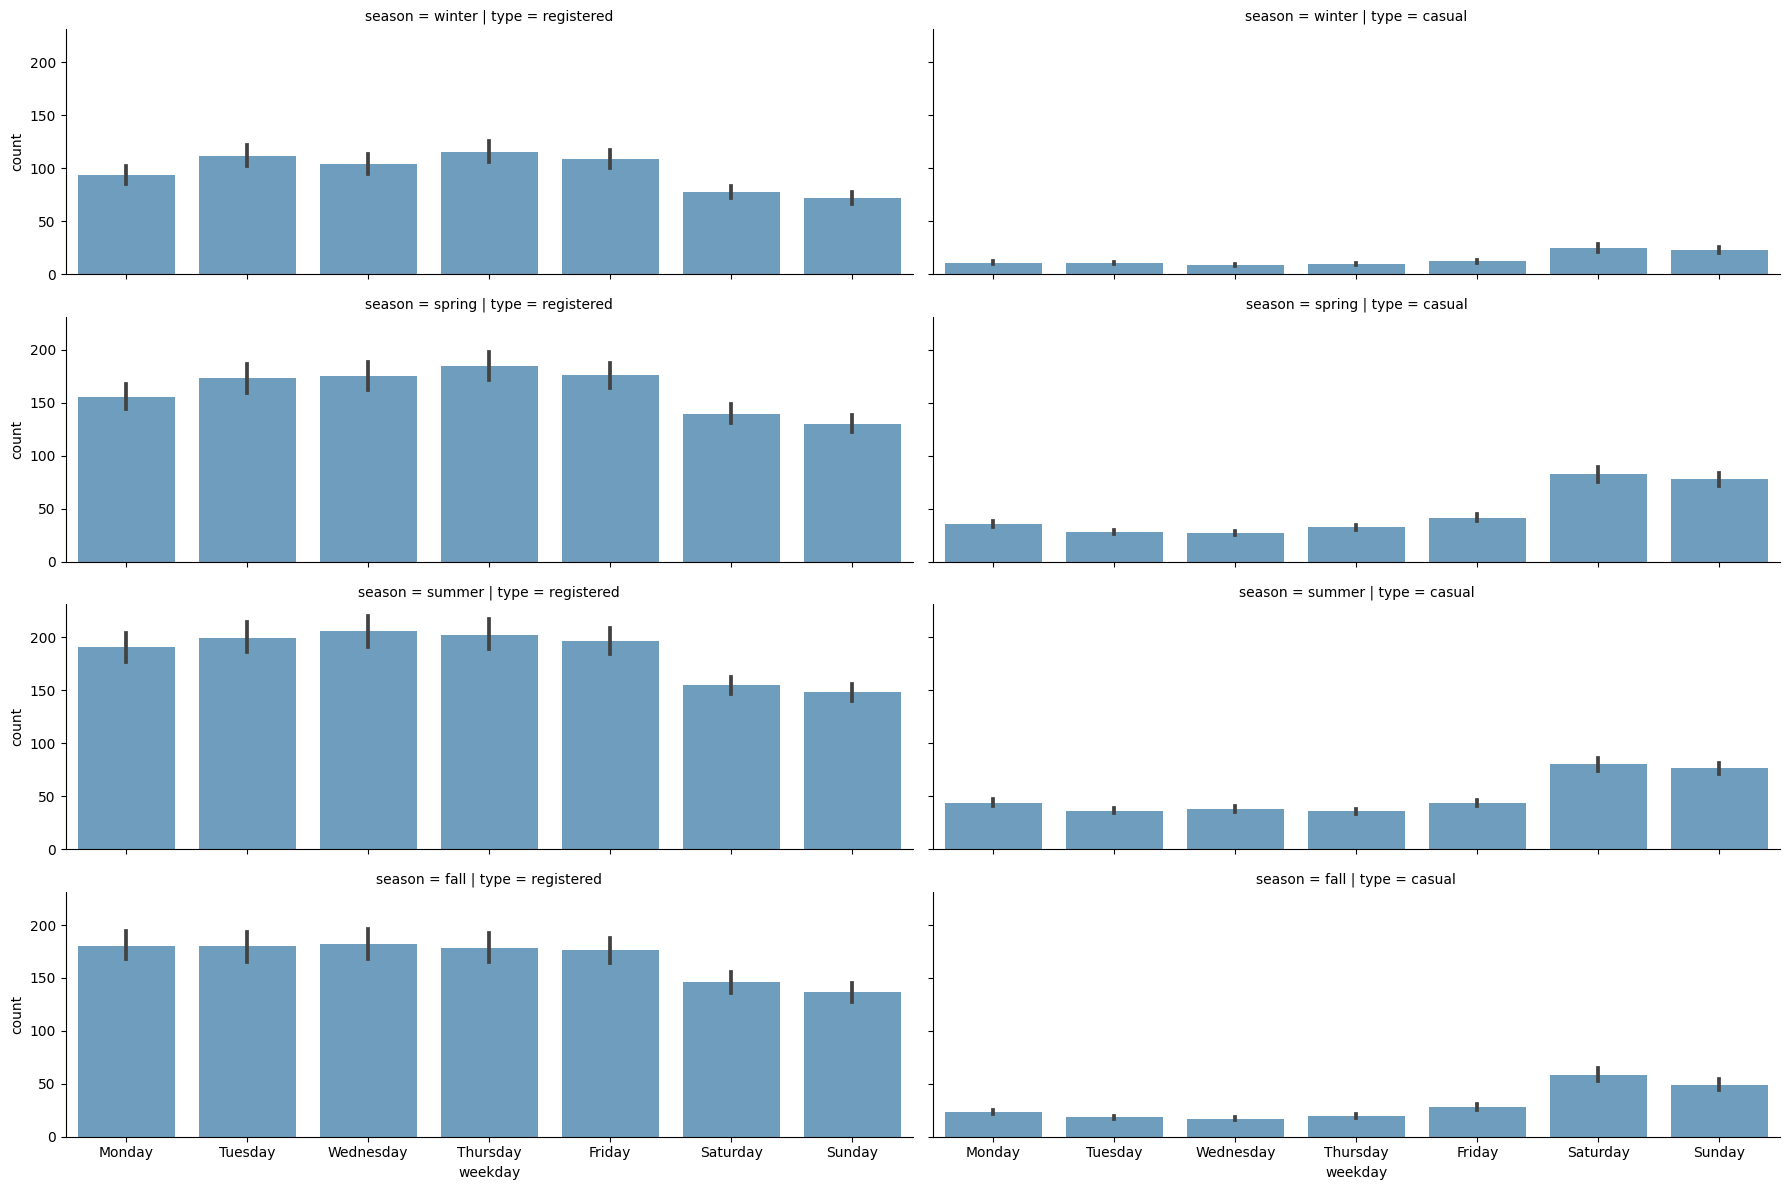

In [ ]:
cols = ['weekday', 'season', 'registered', 'casual']  # Select the needed columns
data = preprocessed_data[cols].melt(id_vars=['weekday', 'season'],\
                                    var_name='type', value_name='count')  # Create unpivot table to plot

order = ['winter', 'spring', 'summer', 'fall']  # the order of the Seasons
ax = sns.FacetGrid(data=data, row='season', col='type',\
                   row_order=order, height=3, aspect=3)  # face grid for the plots

plot_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.map(sns.barplot, 'weekday', 'count', order=plot_order, alpha=0.7)  # apply the barplot  as  our plot

plt.savefig('Figures/Rides of each season represented by days.png', format='png')

### Visualizing Trends
- Showing the Evolution of Regisered and Casual rides over time.
- Using the rolling mean and standard with window of seven (No. days) deviation to smooth the plot

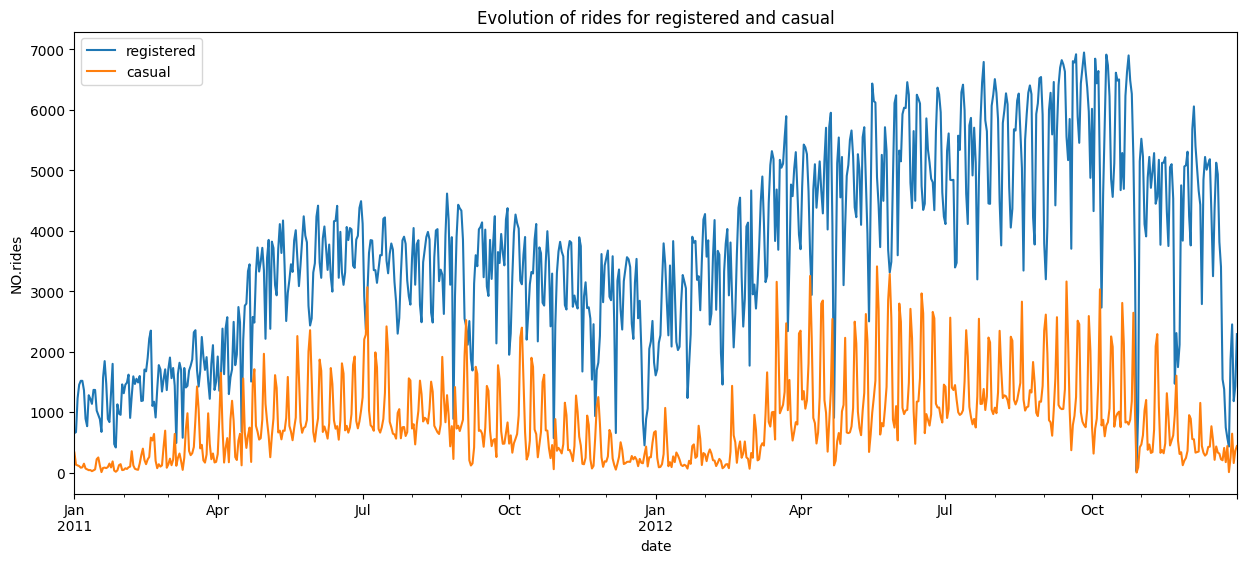

In [ ]:
cols = ['dteday', 'registered', 'casual']
data_plot = preprocessed_data[cols].groupby('dteday').sum().plot(figsize=(15,  6))

plt.xlabel('date')
plt.ylabel('NO.rides')
plt.title('Evolution of rides for registered and casual')
plt.savefig('Figures/Evolution of rides.png', format='png')

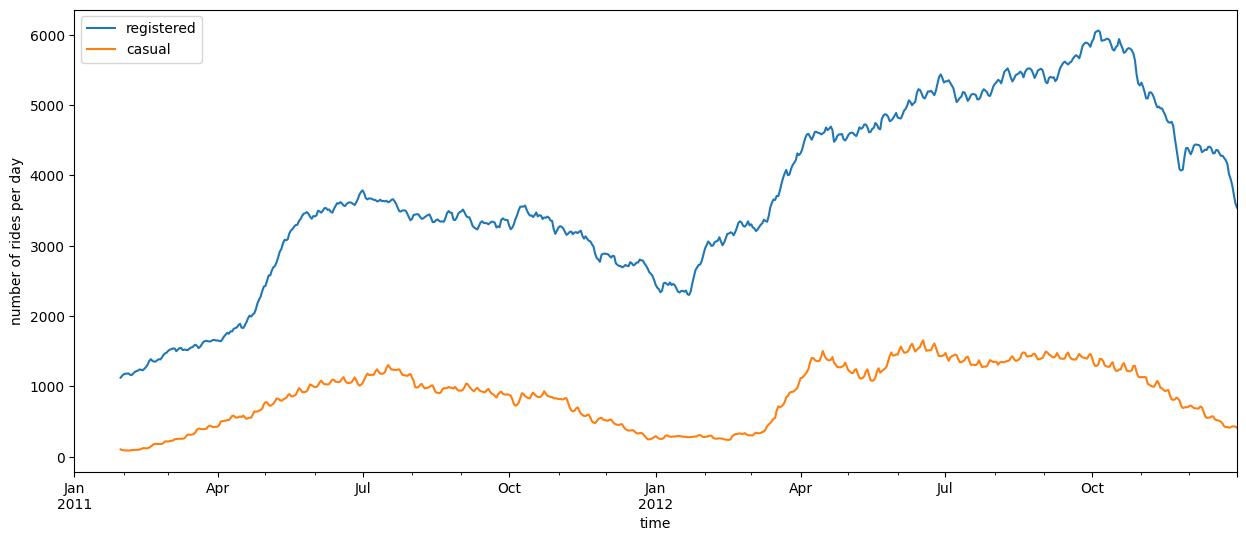

In [ ]:
data_plot = preprocessed_data[cols].groupby('dteday').sum()

rolling_means = data_plot.rolling(30).mean()

ax = rolling_means.plot(figsize=(15, 6))

ax.set_xlabel("time")
ax.set_ylabel("number of rides per day");
plt.savefig('Figures/rides_over_days.png', format='png')

### Now it's time for displaying relations.
- We will define a function to plot regression line plot for each numerical column to the target columns (casual, registered).
- Adding the correlation coeficient to the title of the plot.

In [ ]:
from scipy.stats import spearmanr

def plot_correlation(cols, data):
    cas = data['casual']
    reg = data['registered']
    for col in cols:
        corr_cas = spearmanr(data[col], cas)[0]
        corr_reg = spearmanr(data[col], reg)[0]
        
        ax = sns.regplot(x=col, y='casual', data=data,\
                label=f"{col}|CASUAL (correlation: {np.round(corr_cas, 3)})",\
                scatter_kws={"alpha":0.5})
        
        ax = sns.regplot(x=col, y='registered', data=data,\
                label=f"{col}|REGISTERED (correlation: {np.round(corr_reg, 3)})",\
                scatter_kws={"alpha":0.1})
        
        ax.legend()
        plt.savefig(f'Figures/regression line for {col} on Registered-Casual.png', format='png')
        plt.show()

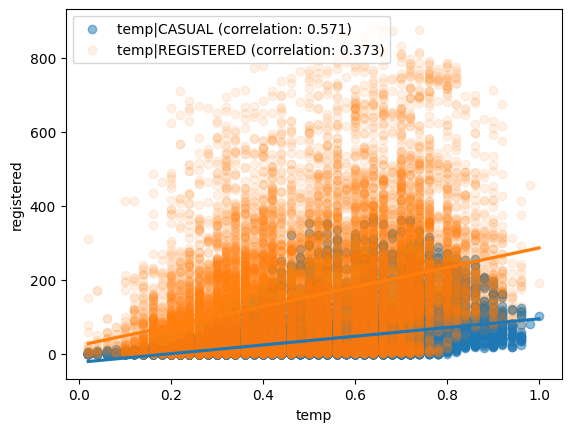

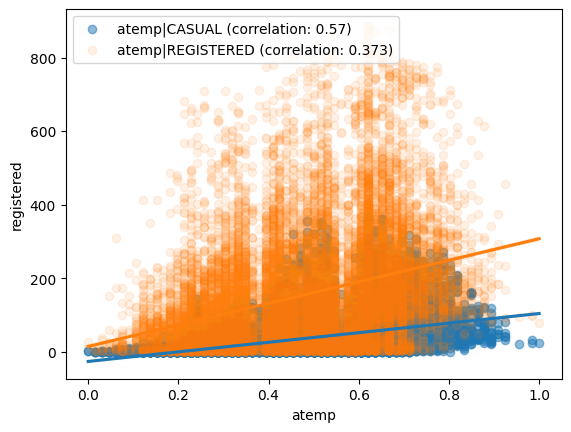

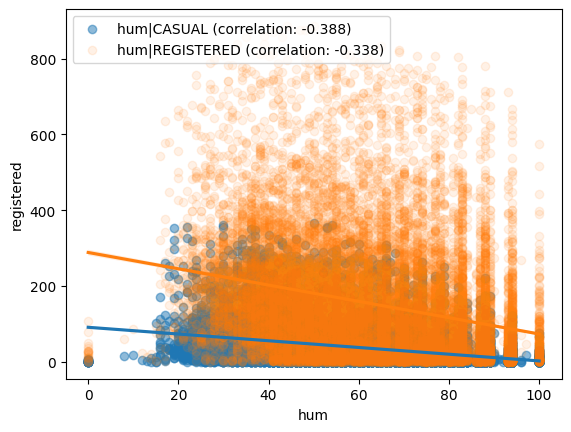

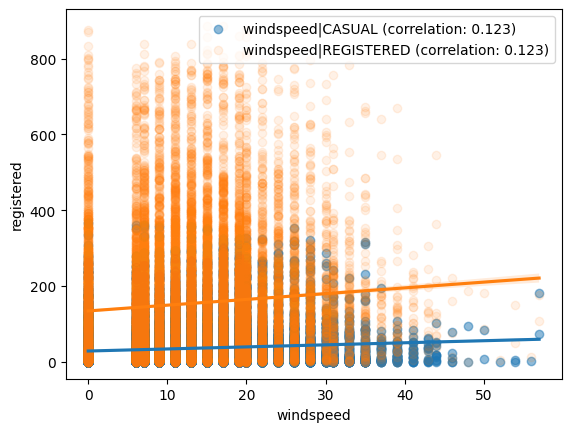

In [ ]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']

plot_correlation(numerical_columns, preprocessed_data)

### calculate the impact of each weather condition on the registered and casual rides

In [ ]:
from  scipy.stats import pearsonr

def wheather_on_reg_and_cas(data, col_name, weather_cond):
    plot_data = data[data['weathersit'] == weather_cond]

    # compute pearson correlation between col_name and registered rides
    pearson_corr_r = pearsonr(plot_data[col_name], plot_data["registered"])
    
    # compute pearson correlation between col_name and registered rides
    pearson_corr_c = pearsonr(plot_data[col_name], plot_data["casual"])

    ax = sns.regplot(data=plot_data, x=col_name, y='registered', scatter_kws={"alpha":0.05}, label='registered')
    ax = sns.regplot(data=plot_data, x=col_name, y='casual', scatter_kws={"alpha":0.05}, label='casual')

    plt.legend()
    ax.set_xlabel('')
    ax.set_ylabel('Number of Rides')
    ax.set_title(f'{col_name}, {weather_cond}, Corr:{pearson_corr_r[0]:3f}, P-val:{pearson_corr_c[1]:3f}')
    return ax

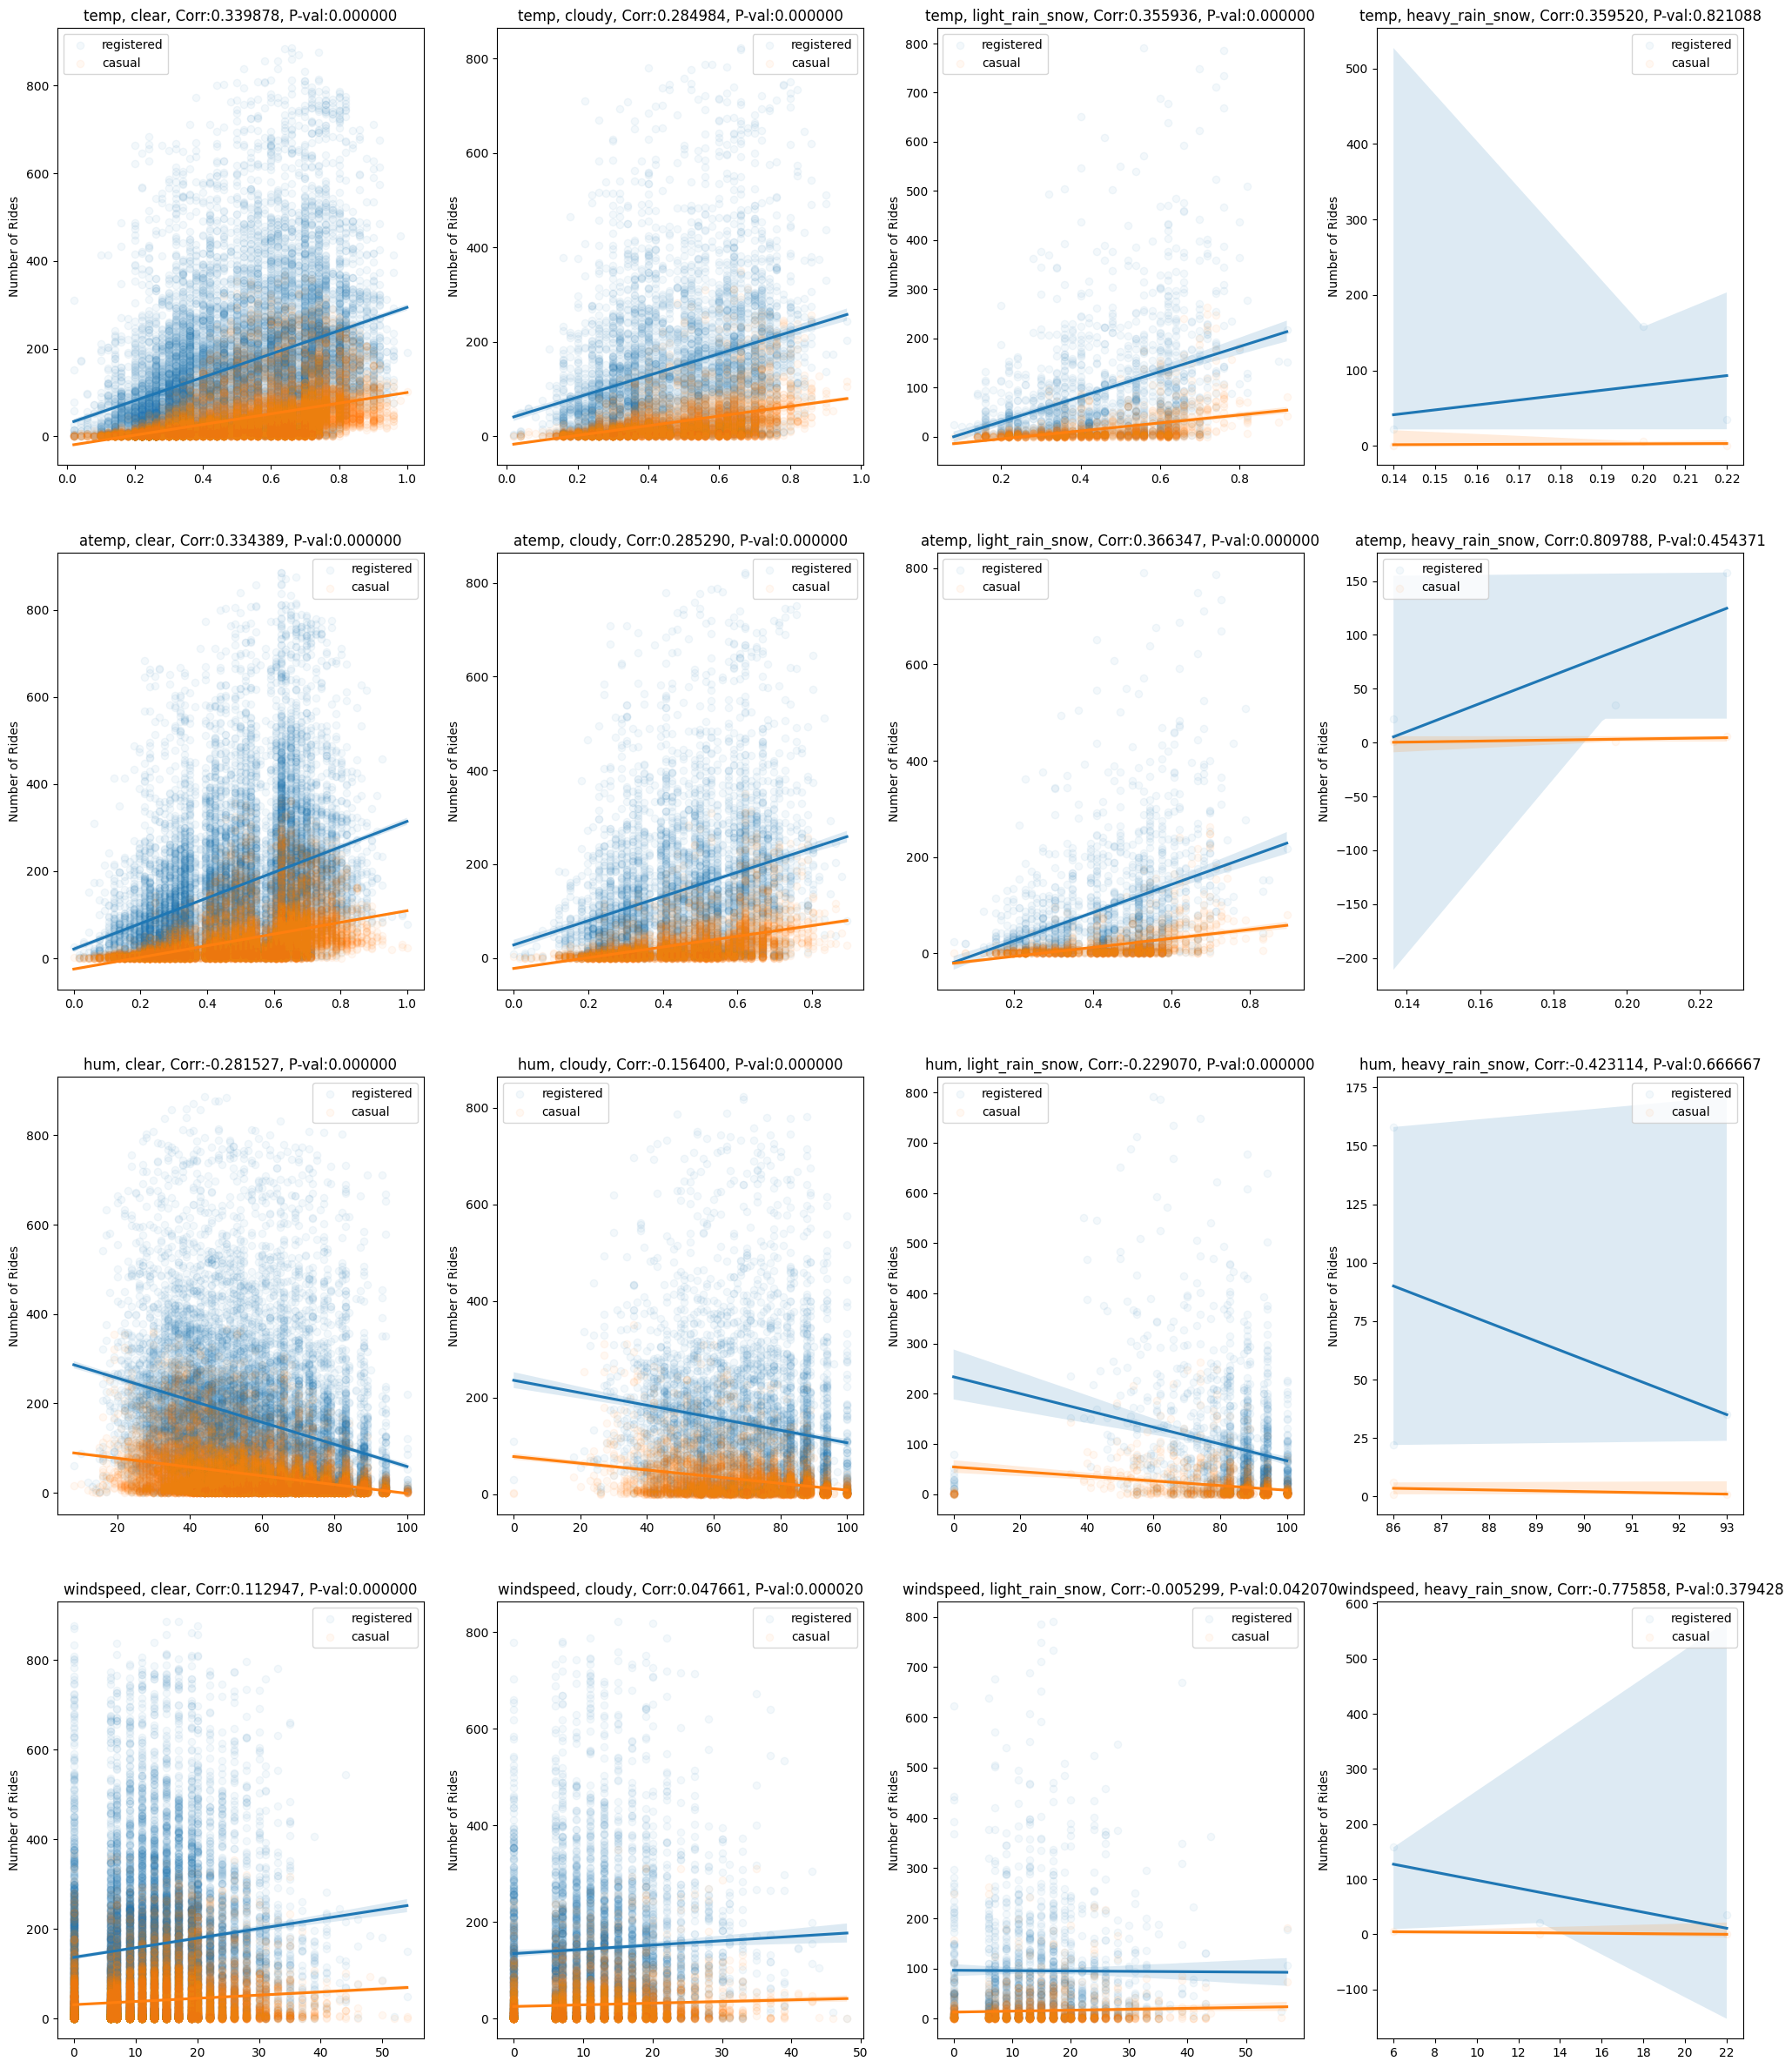

In [ ]:
weather_conditions = preprocessed_data.weathersit.unique()
temps = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize=(25,30))
for col_index, col in enumerate(temps):
    for row_index, weather_cond in enumerate(weather_conditions):
        plot_number = row_index + col_index * 4 + 1
        plt.subplot(4, 4, plot_number)
        wheather_on_reg_and_cas(preprocessed_data, col, weather_cond)
plt.savefig('Figures/impact_of_weather_and_temp.png', format='png')